<a href="https://colab.research.google.com/github/JasonKeha/Python_Projects/blob/main/Student%20Exams%20(EDA%20Python%20Project)/Student_Exams_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
%pylab
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
url = 'https://raw.githubusercontent.com/JasonKeha/Python_Projects/main/Student%20Exams%20(EDA%20Python%20Project)/exams.csv'
df_exams = pd.read_csv(url)
# Reading the (uploaded to Github) csv file with the data that we want to analyse

In [26]:
df_exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


Removing Duplicate Rows

In [27]:
df_exams.drop_duplicates()
df_exams
# There are no duplicates (row count didn't change)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


Cleaning Data

In [28]:
empty_values = df_exams.isnull().sum().sort_values(ascending = False)
percentage = (df_exams.isnull().sum()/df_exams.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([empty_values, percentage], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(8)
# There are no missing data

,Total,Percent
gender,0,0.0
race/ethnicity,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0


# Questions 
* Find the total score (Mean of the other three scores) COMPLETED
* Find data about all the scores (Univariate analysis/Histogram) COMPLETED
* Find the correlation between score and gender, test preparation course and lunch (Correlation Heatmap) COMPLETED
* Do a more thorough analysis of the correlations between scores (Seaborn Pairplot) COMPLETED



### Finding Total Score (Mean of Other Scores)

In [49]:
df_exams['total score'] = df_exams[['math score', 'reading score', 'writing score']].mean(axis=1).round(2)
df_exams
# Finding the total score based on the mean of the three other scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,male,group A,high school,standard,completed,67,67,63,65.67
1,female,group D,some high school,free/reduced,none,40,59,55,51.33
2,male,group E,some college,free/reduced,none,59,60,50,56.33
3,male,group B,high school,standard,none,77,78,68,74.33
4,male,group E,associate's degree,standard,completed,78,73,68,73.00
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.33
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.33
997,female,group C,some high school,free/reduced,none,32,35,41,36.00
998,female,group C,some college,standard,none,73,74,82,76.33


### Univariate Analysis Of Math Score

Skewness: -0.151147
Kurtosis: -0.224849
Mean : 66.396000
Median : 66.500000


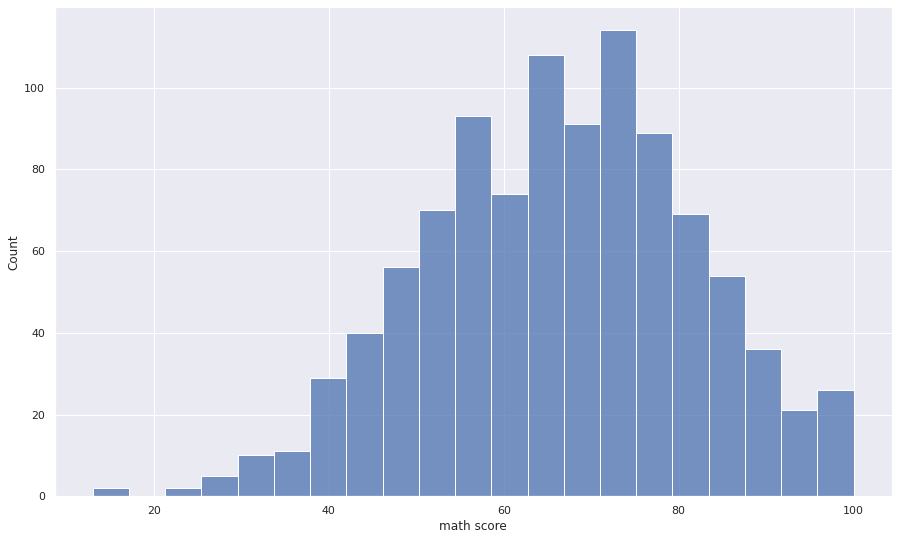

In [46]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.histplot(df_exams['math score']);
print('Skewness: %f' % df_exams['math score'].skew())
print('Kurtosis: %f' % df_exams['math score'].kurt())
print('Mean : %f' % df_exams['math score'].mean())
print('Median : %f' % df_exams['math score'].median())

### Univariate Analysis Of Reading Score

Skewness: -0.191665
Kurtosis: -0.292524
Mean : 69.002000
Median : 70.000000


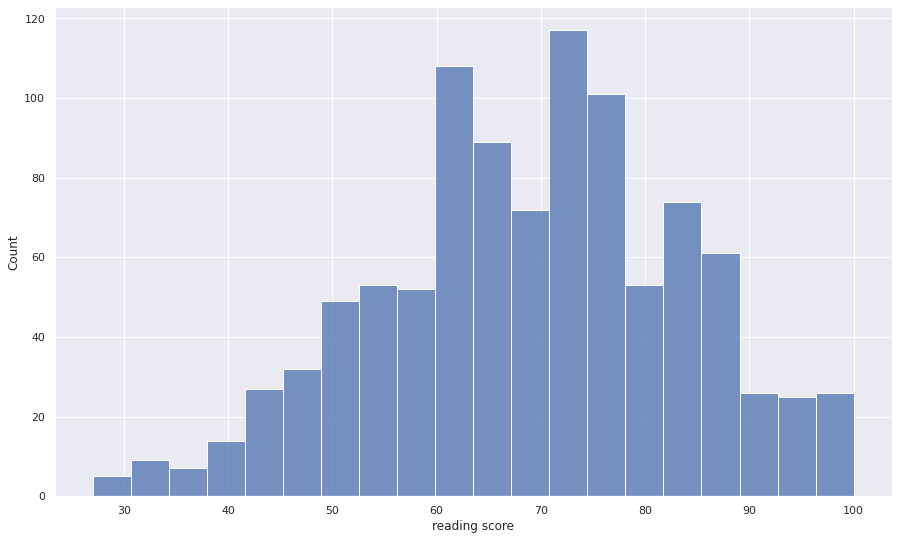

In [45]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.histplot(df_exams['reading score']);
print('Skewness: %f' % df_exams['reading score'].skew())
print('Kurtosis: %f' % df_exams['reading score'].kurt())
print('Mean : %f' % df_exams['reading score'].mean())
print('Median : %f' % df_exams['reading score'].median())

### Univariate Analysis of Writing Score

Skewness: -0.153621
Kurtosis: -0.348572
Mean : 67.738000
Median : 68.000000


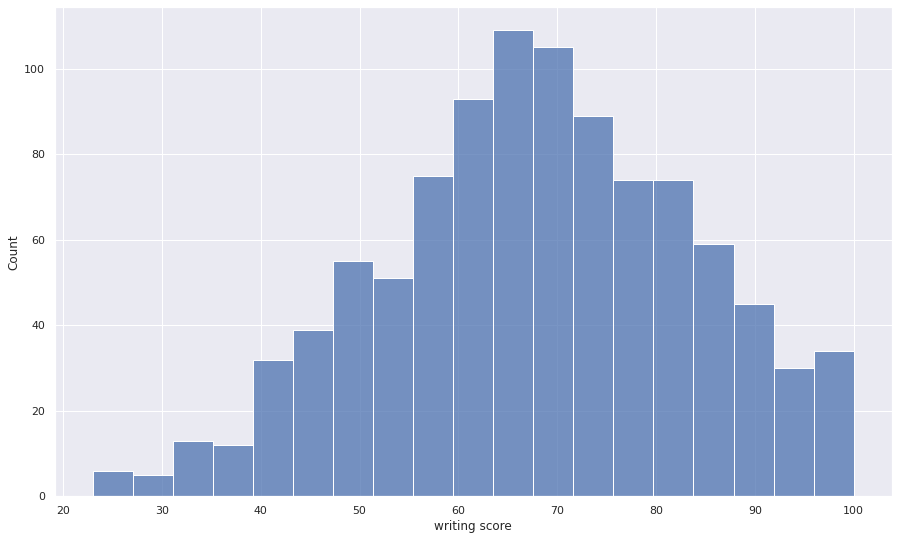

In [32]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.histplot(df_exams['writing score']);
print('Skewness: %f' % df_exams['writing score'].skew())
print('Kurtosis: %f' % df_exams['writing score'].kurt())
print('Mean : %f' % df_exams['writing score'].mean())
print('Median : %f' % df_exams['writing score'].median())

### Univariate Analysis of Total Score

Skewness: -0.176044
Kurtosis: -0.345385
Mean : 67.712000
Median : 67.330000


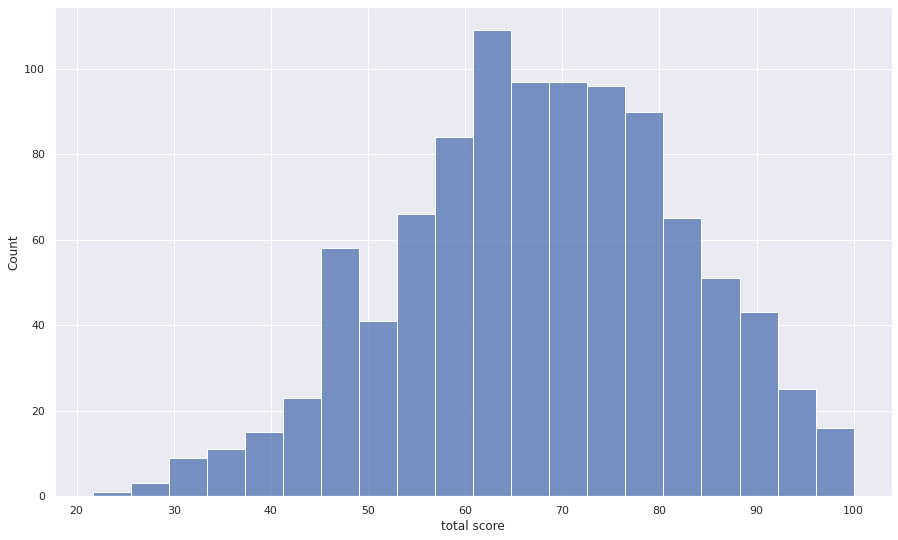

In [33]:
sns.set(rc={'figure.figsize':(15, 9)})
sns.histplot(df_exams['total score']);
print('Skewness: %f' % df_exams['total score'].skew())
print('Kurtosis: %f' % df_exams['total score'].kurt())
print('Mean : %f' % df_exams['total score'].mean())
print('Median : %f' % df_exams['total score'].median())

### Multivariate Analysis

In [50]:
df_exams['converted test preparation course'] = pd.Categorical(df_exams['test preparation course'], ['none', 'completed'], ordered=True).codes
df_exams['converted gender'] = pd.Categorical(df_exams['gender'], ['female', 'male'], ordered=True).codes
df_exams['converted lunch'] = pd.Categorical(df_exams['lunch'], ['free/reduced', 'standard'], ordered=True).codes
# Converting the categorical type of data to numerical representations for enchanced EDA

In [35]:
df_exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,converted test preparation course,converted gender,converted lunch
0,male,group A,high school,standard,completed,67,67,63,65.67,1,1,1
1,female,group D,some high school,free/reduced,none,40,59,55,51.33,0,0,0
2,male,group E,some college,free/reduced,none,59,60,50,56.33,0,1,0
3,male,group B,high school,standard,none,77,78,68,74.33,0,1,1
4,male,group E,associate's degree,standard,completed,78,73,68,73.00,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.33,0,1,1
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.33,1,1,0
997,female,group C,some high school,free/reduced,none,32,35,41,36.00,0,0,0
998,female,group C,some college,standard,none,73,74,82,76.33,0,0,1


# Explanation for the converted values
*   Converted gender: 1 means male, 0 means female
*   Converted test preparation course: 1 means completed, 0 means none
*   Converted lunch: 1 means standard, 0 means free/reduced



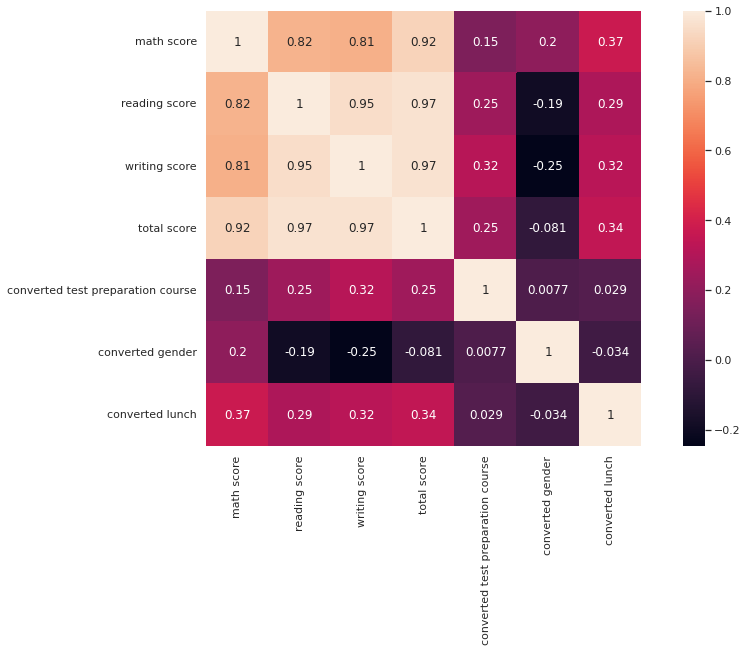

In [36]:
sns.set(rc={'figure.figsize':(15, 8)})
corrmat = df_exams.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True, annot=True)

# **Explanation for the correlation table**
*   Each square represents the correlation between two variables
*   That correlation is based on standard deviation (σ) and it can be positive, negative or non-existent
*   If the correlation is positive, then that means that an increase in one variable leads to an increase in the other correlated variable
*   If the correlation is negative, then that means that an increase in one variable leads to a decrease in the other correlated variable
*   If the correlation is non-existent then that means that the 2 variables don't have any decrease/increase observable relations
----------------------------------------------------------
*   In the case of category variables (gender, lunch etc.) they are converted in a way that can be applied to the correlation table
*   Gender: Positive correlation means better correlation with males and negative correlation means better correlation with females)
*   Test Preparation Course: Positive Correlation means better correlation with people that completed the course and negative correlation means better correlation with people that didn't take the course)
*   Lunch: Positive correlation means better correlation with people that eat standard lunch and negative correlation means better correlation with people that eat free/reduced lunch)









In [53]:
df_exams = df_exams.drop(columns=['converted test preparation course', 'converted gender', 'converted lunch'])

### Pairplot

In [ ]:
sns.set()
cols = ['total score', 'writing score', 'reading score', 'math score']
sns.pairplot(df_exams[cols], height=2.5)
plt.show()